## Loops and Lists

### `for` Loops and Lifetime Savings

Because Python is quick and easy (once you have a handle of it), it serves as a useful tool for playing out ideas.  For example, suppose that we want to visualize a savings decision:

> Once you begin contributing to a savings account, assume that you put away $x$ dollars per year and expect an annual return of $r$.  How much money will you have saved in $55$ years?

Begin by defining the *variables* you need

In [1]:
x = 5000
r = 0.06

Now, *compound* the returns you get over the next $55$ years.  Imagine that today is year 0.  At the end of year 0, you'll have saved $x \times (1+r)$.  Then, after another, you're year zero savings grow by another $(1+r)$, and your year one savings (since you put away $x$ more each year), also grows by $(1+r)$.  The following table helps visualize the idea:

Time | Value of Money Saved at Year 0 | Value of Money Saved at Year 1 | Value of Money Saved at Year 2 | Value of Money Saved at Year 3
- | - | - | - | -
0 | $x$ | . | . | .
1 | $x(1+r)$ | $x$ | . | .
2 | $x(1+r)^2$ | $x(1+r)$ | $x$ | .
3 | $x(1+r)^3$ | $x(1+r)^2$ | $x(1+r)$ | $x$

Add up the values across each column to get the total savings at the *beginning* of a given year.  This sum is reported in the following table:

Time | Total Savings (beginning of year) | Total Savings (algebraically re-arranged)
- | - | -
0 | $x$ | $x$
1 | <span style="color:blue">$x(1+r)+x$</span> | $x(1+r)+x$
2 | <span style="color:red">$x(1+r)^2+x(1+r)+x$</span> | $\Big[$<span style="color:blue">$x(1+r)+x$</span>$\Big](1+r)+x$
3 | $x(1+r)^3+x(1+r)^2+x(1+r)+x$ | $\Big[$<span style="color:red">$x(1+r)^2+x(1+r)+x$</span>$\Big](1+r)+x$

Comparing values across columns two and three of the above table, a convenient pattern emerges.  For instance, the value in year 2, column three equals $x$ plus $(1+r)$ times the value in year 1, column two.

If we want to calculate the value of your savings acount at the beginning of year $55$, we need to tell Python to compound returns for $55$ years.  The really awful way to do this is to tell Python to calculate $x(1+r)^{55}+x(1+r)^{54}+x(1+r)^{53}+...+x(1+r)^2+x(1+r)+x$.  The programmer's way to do this is to use the pattern we pointed out in the above table, and make use of a *for loop* that operates over a range of years.

If we wanted to loop over years $0$ through $3$, we could tell Python to use a `for` loop to iterate over a list of the numbers $0$ through $3$.  A `for` loop has four components to it:
- the word `for` : tells Python to execute a `for` loop
- a variable name : this serves as a *loop index*.  You'll see in a moment what this index does.  A common name used here is the letter `i`
- the word `in` : tells Python that the loop index will be contained within ''something''.
- a list : this is the ''something'' that we loop over.  Every item in the list gets used once.

In [2]:
for i in [0, 1, 2, 3]:
    print(i)

0
1
2
3


What a `for` loop does is tells Python to loop over the list specified (in this case, the list of numbers $0$ through $4$).  For each item in that list, Python sets the loop index variable (in this case, we defined the index variable to be named `i`) equal to that value of the list and then executes every step within the for loop (all of the indented lines of code underneath the line `for`.  Here, our for loop only specifies one action: print out the value of the loop index.

In our motivating example, we want Python to work over a long range of years.  In this case, years $0$ through $55$.
This would be tedious to type out explicitly into `[0, 1, 2, ..., 54, 55]`.  Python has a trick for this, but there's one caveat to keep in mind.  As children, we learn to start counting with the number $1$.  Python, like most programming languages, starts counting with the number $0$.  Thus, the built-in function `range()` uses this starts-at-zero convention.

In [3]:
for t in range(5):
    print(t)

0
1
2
3
4


As demonstrated above, `range(5)` tells Python that the loop should iterate over numbers $0$ through $4$.  Generally, we use `range(n)` to obtain numbers $0$ through $n-1$ (*not* $0$ through $n$).  Thus, we get $n$ numbers out of `range(n)`.  If we want to iterate up through year $55$, we would therefore use the statement `range(56)`.

To calculate the value of your savings after $55$ years, we simply have to type out:

In [4]:
savings = 0 # initially, 0 dollars in savings account
for i in range(56):
    savings = savings*(1+r) + x # each year, pre-existings savings grows by (1+r) and an additional x is added
print(savings)

2094111.7408149564


### Lists

A Python `list` holds a list of items in an ordered way.  For example, a list of favorite things might include
```python3
favorite_things1 = ['raindrops on roses', 'whiskers on kittens', 'bright copper kettles', 'warm woolen mittens']
```
for Julie Andrews, or
```python3
favorite_things2 = ["breakfast at Tiffany's", 'bottles of bubbles', 'girls with tattoos who like getting in trouble']
```
for Ariana Grande.

When we say lists are ordered, it's because we can enter `favorite_things1[0]` and get back `'raindrops on roses'` as Julie Andrew's first favorite thing.  Likewise `favorite_things2[1]` tells us that `'bottles of bubbles'` is Ariana Grande's second favorite thing.  Remember, Python starts counting at zero!

Lists can hold whatever you want.  It could be strings (as shown above), numbers, or even other variables.  Consider a list of daily stock returns
```python3
daily_stock_returns = [0.03, 0.01, -0.02, 0.01, -0.01]
```
Let's input this into the following code block for use throughout this section.

In [5]:
daily_stock_returns = [0.03, 0.01, -0.02, 0.01, -0.01]

If we want the stock return for day 0, we simply type

In [6]:
daily_stock_returns[0]

0.03

and Python gives us back the value.  Now suppose that the five daily stock returns corresponded to a week of stock return data.  How do we convert this data into a weekly return?

$$
\text{weekly return} = (-1) + \Pi_{t=1}^5 (1 + \text{daily return}_t)
$$

In case the $\Pi$ symbol is unfamiliar, it means multiply.  Just like $\sum_{i=1}^3 x_i$ means $x_1 + x_2 + x_3$, the statement $\Pi_{i=1}^3 x_i$ means $x_1 * x_2 * x_3$.

The simple way to do this is

In [7]:
(-1) + (1+daily_stock_returns[0]) * (1+daily_stock_returns[1]) * (1+daily_stock_returns[2]) * (1+daily_stock_returns[3]) * (1+daily_stock_returns[4])

0.019392050600000044

That looks annoying to type out, doesn't it?  Now imagine calculating an annual return from 252 days of daily trading data.  This would be prohbitively tedious.

Luckily, we're learning how to program, which means we can take advantage of useful things like `for` loops to make our lives easier.

In [8]:
weekly_return = 1
for i in range(0,5):
    weekly_return = weekly_return*(1+daily_stock_returns[i])
weekly_return -= 1
print(weekly_return)

0.019392050600000044


Stop to think for a moment about why we set `weekly_return` equal to $1$ before beginning the `for` loop.

Most, if not all, variable types in Python have special functions that exist for those variable types.  For example, string variables contain text, and so these variables have `.upper()` and `.lower()` functions that can be used with them.

In [9]:
my_str = 'Finance Data Science'
print(my_str.upper())

FINANCE DATA SCIENCE


In [10]:
print(my_str.lower())

finance data science


For list variables, two important functions are `.append()` and `.pop()`.  These functions add and remove data from the list, respectively.

In [11]:
my_list = [1, 2, 3]
my_list.append(4)
print(my_list)

[1, 2, 3, 4]


The `.append()` function takes as an argument the data that you want to append to a list, and then adds that data to the end of an existing list.  Note that, as with `.upper()` or `.lower()` for strings, here the function starts with a `.` and follows the variable name.  This is different than using a function like `print()` or, from earlier in this chapter, `wacc()`.  The difference exists because `.append()` is a function defined specifically for list variable types.

In [12]:
my_list = [1, 2, 3]
my_list.pop()
print(my_list)

[1, 2]


Because `.pop()` removes data from a list, you don't necessarily need to say *what* data gets deleted.  By default, if you do not supply an argument to `.pop()` Python will delete the last item from the list.  To specify an element to delete, select it based on that elements position in the list.

In [13]:
my_list = [1, 2, 3]
my_list.pop(0)
print(my_list)

[2, 3]


In Python, `for` loops operate on lists of information.  For example, the command `for i in range(5)` tells Python to operate on the list of numbers from $0$ to $4$.  Likewise, `for i in ['cat', 'dog', 'bird']` tells Python to operate on the list of strings 'cat', 'dog', and 'bird'.  Notice, therfore, that the list of items we loop over does not have to use numbers!  For each element in the given list, Python applies certain commands to that item.  These commands are the lines of code that appear within a `for` loop (the indented section of code that follows the `for` statement.

When the `for` loop operation is only a single line long, there is a special shortcut that we can use.  This shortcut is called **list comprehension**.  Consider the task of subtracting the risk free rate from the list of daily returns in order to compute an excess return.  For simplicity, assume the risk free rate is constant and equal to $0.01$.  One way of achieving this is with the following `for` loop.

In [14]:
excess_returns = []
for i in range(5):
    excess_returns.append( daily_stock_returns[i] - 0.01 )
print(excess_returns)

[0.019999999999999997, 0.0, -0.03, 0.0, -0.02]


Before showing off list comprehension, let's stop and think about one potential issue with the above code.  In the `for` loop above, we explicity refer to the number $5$ when defining the range of the loop.  That's a bad idea.  What if we add more stock return data to our list, and then re-run the above code?  In that scenario, the `for` loop won't execute as intended, since it will still only calculate excess returns for the first five days.

A better way to loop over a list is to use the `len()` function ('len' stands for 'length', but Python is nice and only expects us to type out three characters instead of six).  The function `len()` can calculate the length of a list.

In [15]:
len(daily_stock_returns)

5

Hence, we improve uppon our `for` loop above by removing the explicit reference to the number $5$.

In [16]:
excess_returns = []
for i in range( len(daily_stock_returns) ):
    excess_returns.append( daily_stock_returns[i] - 0.01 )
print(excess_returns)

[0.019999999999999997, 0.0, -0.03, 0.0, -0.02]


Now, the above code will work as expected, regardless of how many items are in the `daily_stock_returns` list.

An alternative to using `len()` and referencing list elements by their index position (i.e. doing `daily_stock_returns[i]`) is to simply tell Python that we want to loop over `daily_stock_returns`.  Thus, rather than telling Python we want to loop over `range(5)` or over `range( len(daily_stock_returns) )`, we can simply tell Python to loop over `daily_stock_returns` directly.

In [17]:
for i in daily_stock_returns:
    print(i)

0.03
0.01
-0.02
0.01
-0.01


Thus, an alternative improvement to the `for` loop is to do the following.

In [18]:
excess_returns = []
for i in daily_stock_returns:
    excess_returns.append( i - .01 )
print(excess_returns)

[0.019999999999999997, 0.0, -0.03, 0.0, -0.02]


If you don't need to use the list index position inside the `for` loop (as is the case here), it's better to loop over the list directly, rather than a list of numbers coresponding to the index positions.  The reason is that this form of the `for` loop is the cleanest.  It requires the least amount of typing, and it is the easiest to read.

Now that we've seen that we can loop over a list directly (rather than looping over index positions for the list), we can explain list comprehension.  List comprehension takes a simple `for` loop (with one line of code inside the loop) and converts the loop into a neater, shorter piece of code.  Consider the following example.

In [19]:
[i for i in daily_stock_returns]

[0.03, 0.01, -0.02, 0.01, -0.01]

The statment is wrapped up in square brackets, indicating a `list` variable.  Within these square brackets, we tell Python to add to this list the value `i`, where we define `i` as any element of `daily_stock_returns`.

Rather than adding simply `i` to this new list, we could add some function of `i`.  For instance, we can substract the risk free rate.

In [20]:
[i - .01 for i in daily_stock_returns]

[0.019999999999999997, 0.0, -0.03, 0.0, -0.02]

Hence, the easiest way to compute excess returns is with the simple, one-line statement:

In [21]:
excess_returns = [i - .01 for i in daily_stock_returns]
print(excess_returns)

[0.019999999999999997, 0.0, -0.03, 0.0, -0.02]


Because list comprehension is just a shortcut to writting out a simple `for` loop, a person could use Python perfectly fine without knowing how to use list comprehension.  However, it's a popular shortcut, so we highlight it here because it will be used throught this text.

### `for` Loops and Delayed Savings

Consider a slightly modified version of the lifetime savings problem provided above.

> Once you begin contributing to a savings account, assume that you put away $x$ dollars per year and expect an annual return of $r$.  How valuable is it to start saving now as opposed to $10$ years from now?

Again, begin by defining some values for $x$ and $r$.

In [22]:
x = 5000
r = 0.06

Next, define two list variables.  These will store the value of savings accounts over time.  In the previous example, we updated the value for the savings account each year.  Here, we record the value of the account at each point in time.  This is useful because we can then plot the data and explore this delayed savings problem more carefully.

In [23]:
save_now = [x]    # value of saving account when savings starts immediately
save_later = [0]  # value of saving account when savings starts 10 years from now

These list variables store one value each (the value $x$ and the value $0$), which corresponds to the value of the savings account at the beginning of year $0$.  Under the "save-now" plan, $x$ is put away immediately.  Under the "save-later" plan, $x$ is not put away until year 10.

Now, what we want to do is think about what happens each year.  In the first scenario (begin saving immediately), the savings account grows by `(1+r)` each year, plus an additional `x` that gets added in.  In the second scenario, the savings account only begins growing after year 10, and contributions only begin in year 10.  Before that, nothing happens.

Using `if`/`else` logic, a `for` loop, and the `.append()` function for lists, we can evaluate these two savings plans.

We'll begin with the "save-now" savings plan, since this is similar to the problem from the beginning of the chapter.  A difference implemented here is that we call the `.append()` function to add values to the `save_now` list.

In [24]:
for i in range(1,56): # loop over i from 1 to 55
    account_value_last_year = save_now[i-1] # e.g. for i = 1 (year 1), loop up account value at i = 0 (year 0)
    account_value_next_year = account_value_last_year * (1+r) + x
    save_now.append( account_value_next_year )

At the beginning of the chapter, we defined a variable `savings`, and updated that variable's value each loop iteration.  Here, the list variable `save_now` keeps track of *each* of the savings account values (that is, the value of the account at year 0, at year 1, ..., at year 55).  This is useful for plotting a figure, which we'll do at the end of the chapter.

Next, we modify the above `for` loop to work on the "save-later" plan.  The important distinction here is that, for the first ten years (list index values $0-9$, since Python starts counting at $0$), no money is put in to the savings account.  Thus, we set the first ten values of the `save_later` list equal to $0$.

In [25]:
for i in range(1,56):
    if i > 9:
        save_later.append( save_later[i-1]*(1+r) + x )
    else:
        save_later.append( 0 )

Plotting will be covered in greater detail in a later chapter, so don't worry about understanding the meaning of the following code block.  The important takeaway is what's presented in the figure it creates.

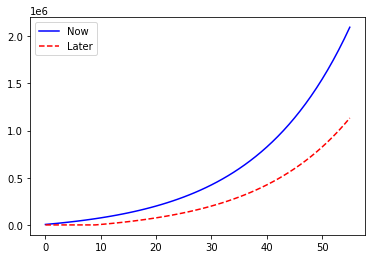

In [26]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.plot(range(0,56), save_now, color='b', label='Now')
plt.plot(range(0,56), save_later, color='r', label='Later', linestyle='--')
plt.legend()
plt.show()